# 1. Data Preparation (Library and Import Files)

First of all, we have to import the libraries used for  data visualization and dataset that being used. Then, we will know the data type of each variable.

In [ ]:
# Import Library (used for data visualization)
library(ggplot2)
library(readr)
library(dplyr)

In [8]:
# Import Dataset that being used 
# Source : https://www.kaggle.com/datasets/faisaljanjua0555/daily-gold-price-historical-dataset
gold <- read_csv("gold.csv")

Rows: 5703 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): Currency
dbl  (5): Open, High, Low, Close, Volume
date (1): Date

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [9]:
# Show the data from the dataset
head(gold)

Date,Open,High,Low,Close,Volume,Currency
<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
2000-01-04,289.5,289.5,280.0,283.7,21621,USD
2000-01-05,283.7,285.0,281.0,282.1,25448,USD
2000-01-06,281.6,282.8,280.2,282.4,19055,USD
2000-01-07,282.5,284.5,282.0,282.9,11266,USD
2000-01-10,282.4,283.9,281.8,282.7,30603,USD
2000-01-11,282.4,285.3,281.9,284.4,13500,USD


In [10]:
tail(gold)

Date,Open,High,Low,Close,Volume,Currency
<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
2022-08-26,1771.8,1772.30,1746.20,1749.8,176904,USD
2022-08-29,1748.4,1757.90,1731.40,1749.7,156220,USD
2022-08-30,1749.8,1752.80,1732.90,1736.3,130664,USD
2022-08-31,1735.5,1738.00,1720.60,1726.2,176731,USD
2022-09-01,1723.0,1723.00,1699.10,1709.3,198618,USD
2022-09-02,1707.9,1729.45,1707.05,1723.0,0,USD


After that, we can show the data from the dataset by using the head and tail functions to see the first 6 data and the last 6 data from the dataset. The gold dataset head shows the first 6 data where the dataset has 7 columns. The first column contains dates/data starting from January 4th 2022, the second to sixth columns contain double number (decimal) data and the last column is a string (character) indicating the form of currency. The tail dataset from gold also shows 6 data from below where the dataset has 7 columns same as the head. When compared with the head dataset, it can be seen that there is an increase in the value/price of gold for each open, high, low, close price. And it can be analyzed that the currency of the gold price is consistent with using USD.

# 2. Data Cleaning

## 2.1 Familiarize with the Data Set

In [11]:
# The first step is to make sure that we already familiar with the data and know what's inside the data.

str(gold)

spc_tbl_ [5,703 × 7] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ Date    : Date[1:5703], format: "2000-01-04" "2000-01-05" ...
 $ Open    : num [1:5703] 290 284 282 282 282 ...
 $ High    : num [1:5703] 290 285 283 284 284 ...
 $ Low     : num [1:5703] 280 281 280 282 282 ...
 $ Close   : num [1:5703] 284 282 282 283 283 ...
 $ Volume  : num [1:5703] 21621 25448 19055 11266 30603 ...
 $ Currency: chr [1:5703] "USD" "USD" "USD" "USD" ...
 - attr(*, "spec")=
  .. cols(
  ..   Date = col_date(format = ""),
  ..   Open = col_double(),
  ..   High = col_double(),
  ..   Low = col_double(),
  ..   Close = col_double(),
  ..   Volume = col_double(),
  ..   Currency = col_character()
  .. )
 - attr(*, "problems")=<externalptr> 


From the output, it can be seen that [5,703 x 7] means that the dataset has 5,703 rows and 7 columns. In other words, each column has 5,703 rows and we can see the data type of each column.

## 2.2 Check Structure Errors

This step is actually to ensure the data is in character/string form. In this dataset, only currency is in that form.It will be checked for string inconsistencies (such as typos, USD acronym writing). If the result only consists 1 output, it means the string data is consisten.

In [12]:
unique(gold$Currency)

[1] "USD"

From the output results, it can be analyzed that this dataset does not have structure errors because the output only outputs 1 output and 1 unique value, namely "USD" with consistent USD writing for the currency column.

## 2.3 Handling Missing Value

There are actually 2 ways to handle missing values, such as using mean values of the data and sum of the null data. 

### 2.3.1 Mean values of the data

In the process, mean () is used because if one of the data from each column has NA value, then the output is also NA.
To ensure the absence of NA values, then use "na.rm = TRUE" 

In [13]:
mean(gold$Open, na.rm = TRUE)
mean(gold$High, na.rm = TRUE)
mean(gold$Low, na.rm = TRUE)
mean(gold$Close, na.rm = TRUE)
mean(gold$Volume, na.rm = TRUE)

[1] 1040.383

[1] 1048.339

[1] 1031.863

[1] 1040.298

[1] 139141.7

### 2.3.1 Sum of the null data

If the output result is 0, then there is no NA data in the data set.

In [14]:
sum(is.na(gold))

[1] 0

From the results above, it can be seen that this dataset has no data that is NA.

## 2.4 Check data irregularities

This step actually uses logic in checking. For example: the price will never be in negative (minimum for money is $0 USD) and the date cannot be more than 31 nor the month more than 12.

In [15]:
summary(gold)

      Date                 Open             High             Low        
 Min.   :2000-01-04   Min.   : 256.6   Min.   : 259.4   Min.   : 255.1  
 1st Qu.:2005-09-19   1st Qu.: 459.9   1st Qu.: 463.9   1st Qu.: 457.4  
 Median :2011-05-10   Median :1188.8   Median :1198.0   Median :1179.7  
 Mean   :2011-05-10   Mean   :1040.4   Mean   :1048.3   Mean   :1031.9  
 3rd Qu.:2017-01-04   3rd Qu.:1381.4   3rd Qu.:1392.8   3rd Qu.:1368.1  
 Max.   :2022-09-02   Max.   :2076.4   Max.   :2089.2   Max.   :2049.0  
     Close            Volume         Currency        
 Min.   : 256.6   Min.   :     0   Length:5703       
 1st Qu.: 460.5   1st Qu.: 52938   Class :character  
 Median :1188.7   Median :126006   Mode  :character  
 Mean   :1040.3   Mean   :139142                     
 3rd Qu.:1383.0   3rd Qu.:193109                     
 Max.   :2069.4   Max.   :816531                     

Based on the output, it can be concluded that the date written is correct and the price for each open, high, low & close, nothing has a negative value. So, for this data cleaning section, all datasets can be confirmed to be clean and are not in the form of raw datasets.

# 3. Data Visualization

## 3.1 Open 

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


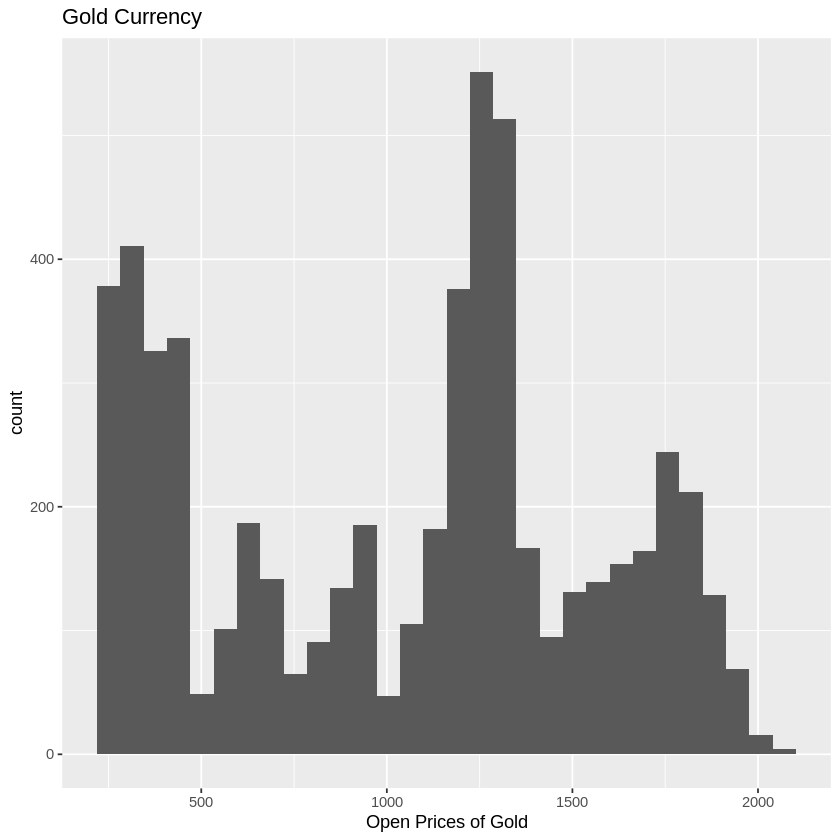

In [16]:
ggplot(gold, aes(x = Open)) +
  geom_histogram() +
  labs(title = "Gold Currency",
      x = "Open Prices of Gold")

From the “open price” visualization, it can be seen that the “open prices” from year 2000-2022 are between 1000-15000 USD, and that the highest “open price” value is above 2000USD. 

## 3.2 Low

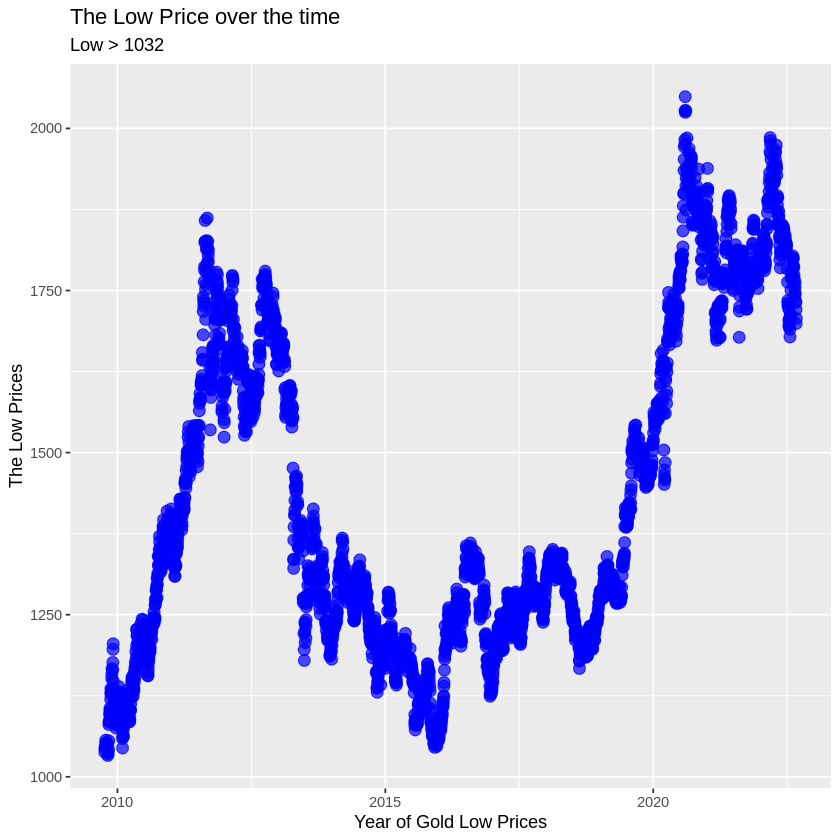

In [18]:
plotdata <- filter(gold, Low > 1032)
ggplot(data = plotdata,
       mapping = aes(x = Date, y = Low)) +
          geom_point(color = "blue",
          alpha = .7,
             size = 3) +
           labs(y = "The Low Prices", 
               x = "Year of Gold Low Prices",
                title = "The Low Price over the time",
                subtitle = "Low > 1032") 

From the “low price” visualization, we can see the price that are above the “low price” average, which is larger than 1032 USD, are located between the year 2010 to 2022.

## 3.3 High

Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


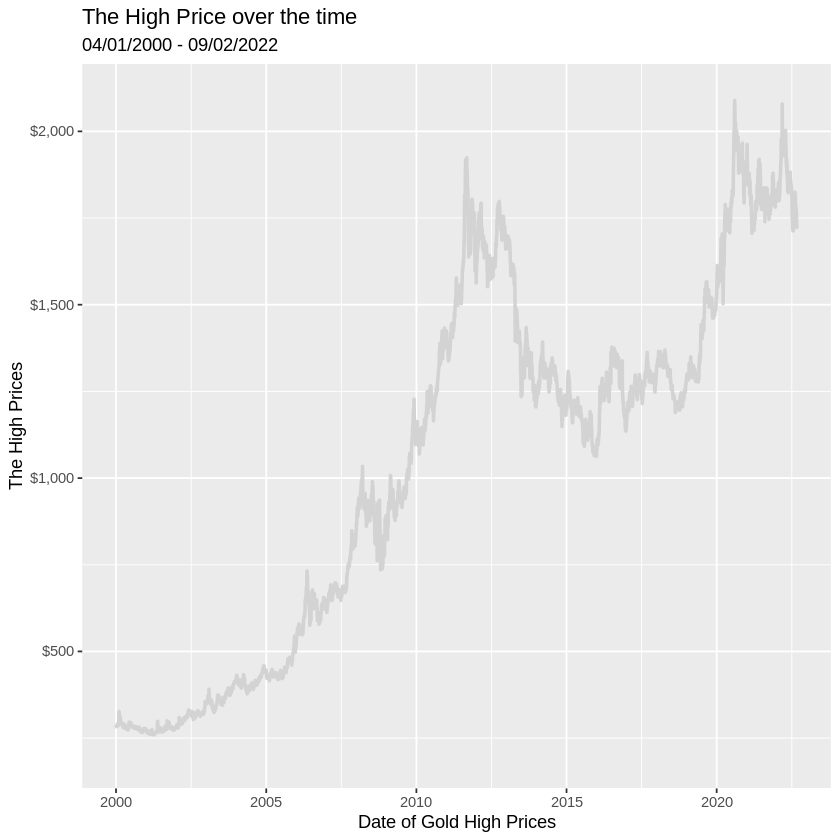

In [19]:
ggplot(gold, 
       aes(x = Date, 
           y = High)) +
  geom_line(size = 1, 
            color = "lightgrey") +
  scale_y_continuous(label = scales::dollar, 
                     limits = c(200, 2100))+
  labs(y = "The High Prices", 
       x = "Date of Gold High Prices",
       title = "The High Price over the time",
       subtitle = "04/01/2000 - 09/02/2022")  

For the "High" variable, we want to know the average of the prices for each year.

From the high price visualization above, the “high price” has increased between year 2000 to 2013, but in 2014, the gold high price started to decrease until 2015. But, in 2016 the “high price” started to rise again until the last collected data in   2022.

In [20]:
#To zoom in the graph above
options(repr.plot.width=8, repr.plot.height=8)

#duplicate gold
data_new<-gold

#create new year and month coloums
data_new$year <- strftime(data_new$Date, "%Y")
data_new$month <- strftime(data_new$Date, "%m")

#aggregate into average yearly data 
avgHigh<-aggregate(High~year, data_new, FUN=mean)

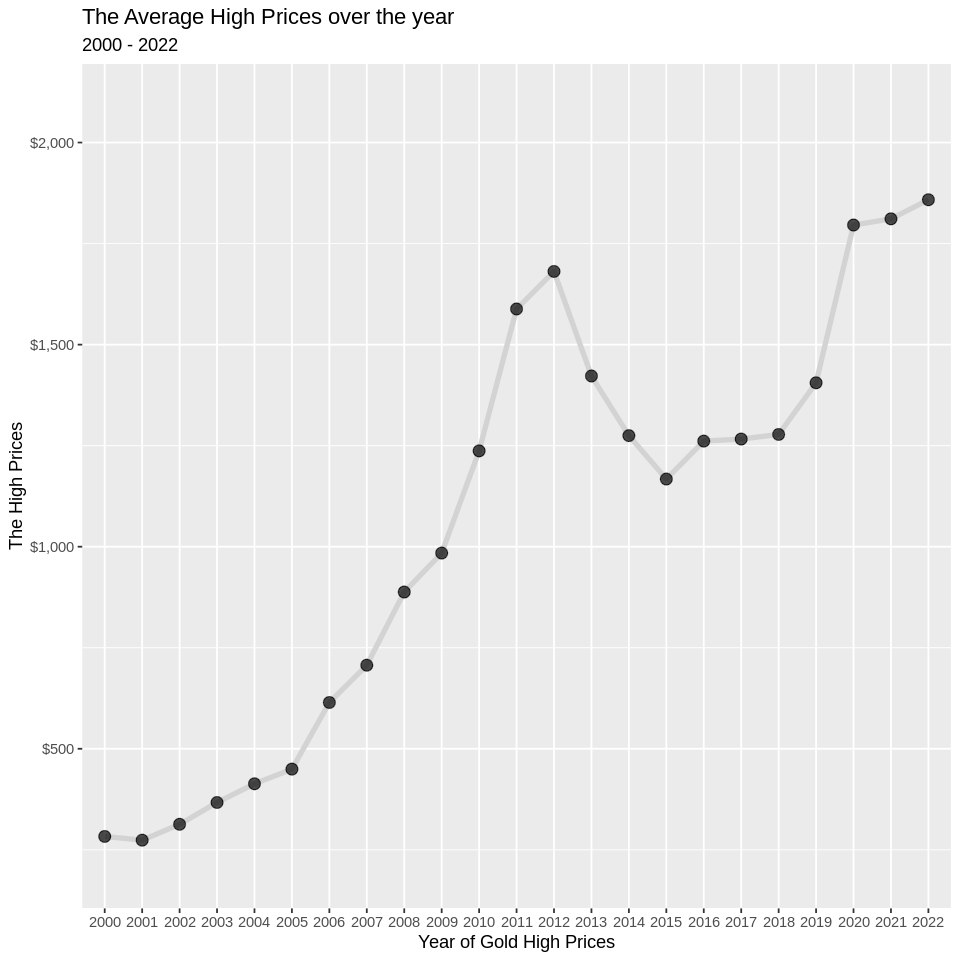

In [22]:
ggplot(avgHigh, 
       aes(x = year, 
           y = High,
           group=1)) +
  geom_line(size = 1.5, 
            alpha = 1,
            color = "lightgrey") +
  geom_point(size = 3, 
             alpha = .7,
             color = "black") +
  scale_y_continuous(label = scales::dollar, 
                     limits = c(200, 2100))+
  labs(y = "The High Prices", 
       x = "Year of Gold High Prices",
       title = "The Average High Prices over the year",
       subtitle = "2000 - 2022")

From the graph above, we can also see that the largest “high price” happened in year 2022 with the value of 2089.2 USD (according to the summary).

## 3.4 Close and Analysis of the Visualization

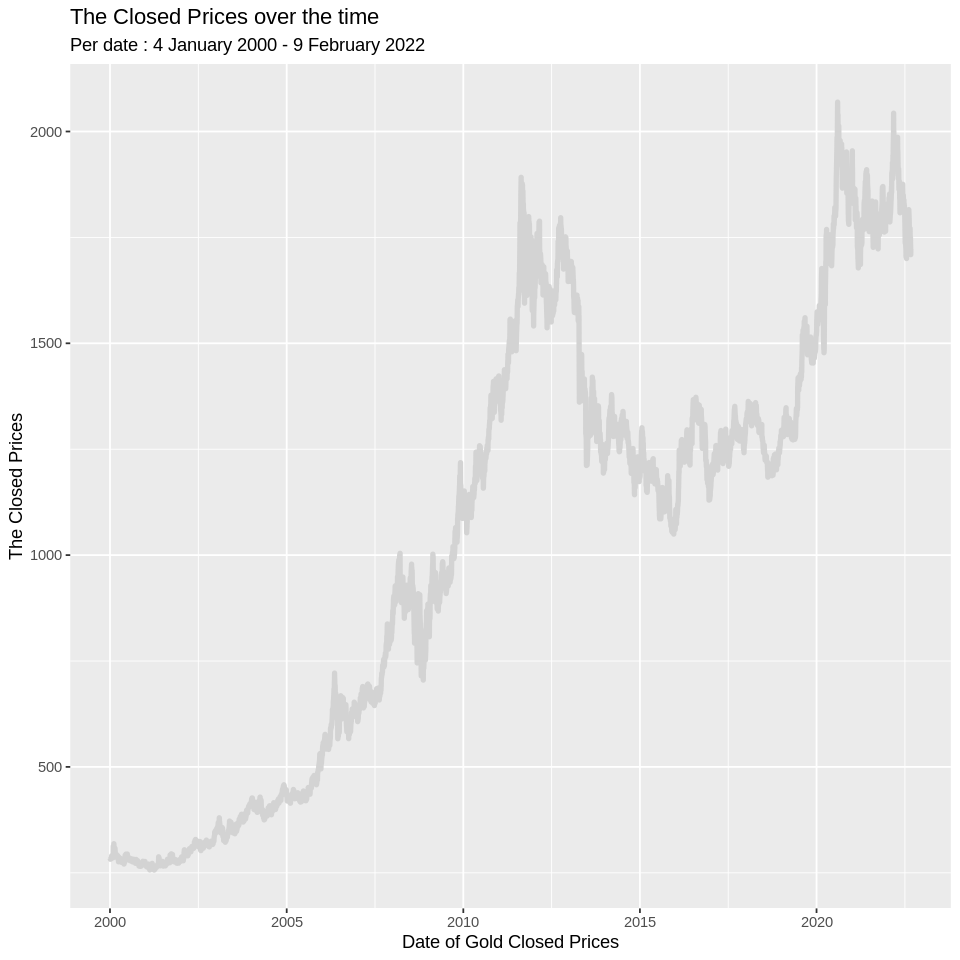

In [23]:
ggplot(gold, 
       aes(x = Date, 
           y = Close)) +
  geom_line(size = 1.5, 
            color = "lightgrey") +
 # geom_point(size = 3, 
 #           color = "steelblue") +
  labs(y = "The Closed Prices", 
       x = "Date of Gold Closed Prices",
       title = "The Closed Prices over the time",
       subtitle = "Per date : 4 January 2000 - 9 February 2022")

The graph above shows the “close price” of gold from the year 2000 – 2020, with the bins range every 5 years. From the graph above, there was a significant increase in “closed price” of gold from year 2000 until 2012. There is a possibility that there was an increase of demand from the customer within the period of 12 years.
Furthermore, in the period around 2013 until the end of 2019, there was a drastic decrease in the “closed price” of gold. This happened in terms of the United States economy, where it is likely that in that specific time frame, the US government carried out a tempering policy of lowering interest rates as a form of reducing purchases of assets such as bonds and gold. The emphasis on the asset purchases is one of the reasons why the price of gold plummet , which not only affected the US country, but also other countries, such as Indonesia.


# 4. Exploratiry Data Analysis (EDA)

## 4.1 Separated between independent (X) and dependent (y) variable

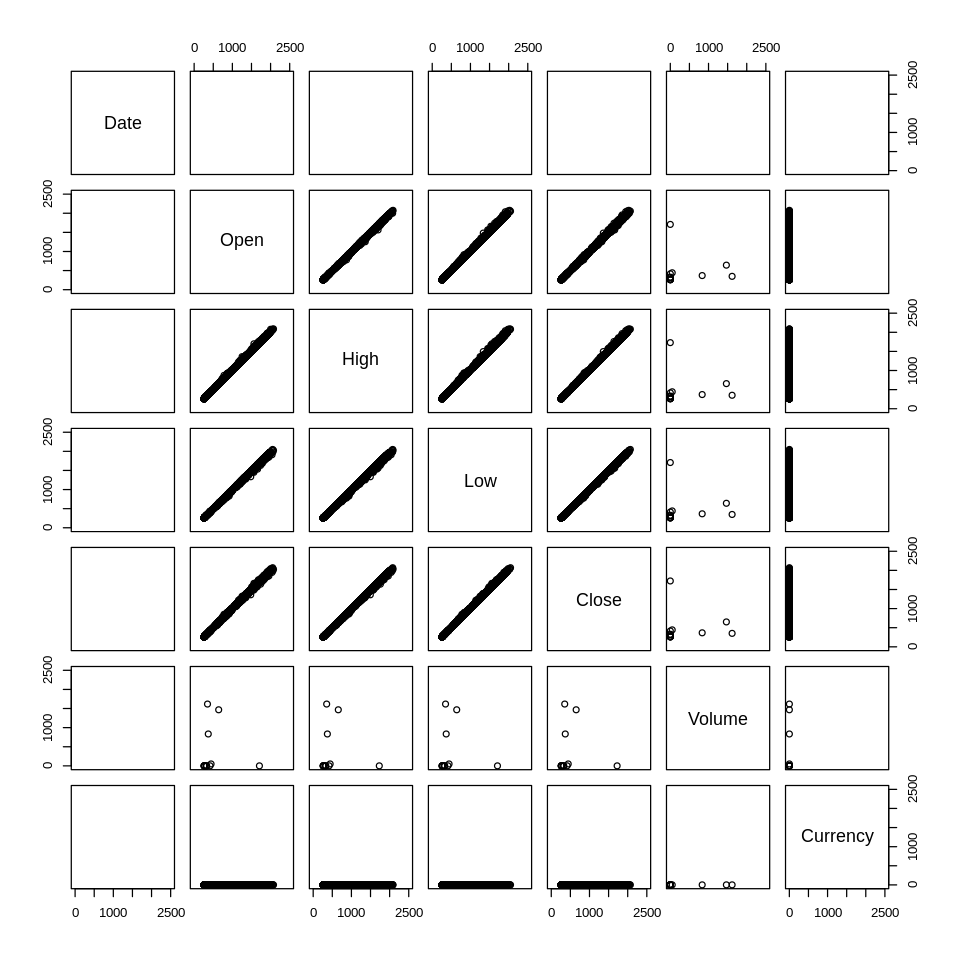

In [24]:
plot(gold, xlim=c(0,2500), ylim = c(0,2500))

In [25]:
goldmodel <- lm(Open ~ High + Low + Close + Volume, data=gold)
summary(goldmodel)


Call:
lm(formula = Open ~ High + Low + Close + Volume, data = gold)

Residuals:
    Min      1Q  Median      3Q     Max 
-50.620  -2.134   0.188   2.251  47.351 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -4.120e-01  1.606e-01  -2.565  0.01033 *  
High         9.318e-01  8.661e-03 107.592  < 2e-16 ***
Low          7.938e-01  9.695e-03  81.876  < 2e-16 ***
Close       -7.256e-01  1.199e-02 -60.509  < 2e-16 ***
Volume      -2.711e-06  1.023e-06  -2.651  0.00804 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.406 on 5698 degrees of freedom
Multiple R-squared:  0.9999,	Adjusted R-squared:  0.9999 
F-statistic: 1.312e+07 on 4 and 5698 DF,  p-value: < 2.2e-16


First, we must separate the independent (X) and dependent (Y) variables. Checking the independent and dependent variables can use linear regression. The value of Multiple R-squared is close to 1 or perfect fit, which means that open, high, low, close data are interdependent with each other, where if the open price goes up, for high, low, close it will also go up (affected). Based on the plot, date can be said to be an independent variables are the cause of price changes.



## 4.2 Finding the missing value and imputation

In [26]:
sum(is.na(gold))

[1] 0

After that, we have to find the missing value and imputation. Based on the results we got, it was found that none of the data in the gold file was NA or NULL. 

In [27]:
# Replacing the columns missing value with zero
gold$Open[is.na(gold$Open)]<-0
gold$High[is.na(gold$High)]<-0
gold$Low[is.na(gold$Low)]<-0
gold$Close[is.na(gold$Close)]<-0
gold$Volume[is.na(gold$Volume)]<-0

If there is an Open/High/Low/Close/Volume data that has a NA or NULL value, that data will be filled with a value of 0. Based on the analysis, that for each data in open, high, low, close, and volume does not have a NA value or the data does not have NULL data. In another sense, the data is clean and there is no missing value.

But in fact, the data no missing value, so the steps above is just to fill this part since we already check the missing value on the data cleaning process.

## 4.3 Finding the outlier and remove or handling the outlier

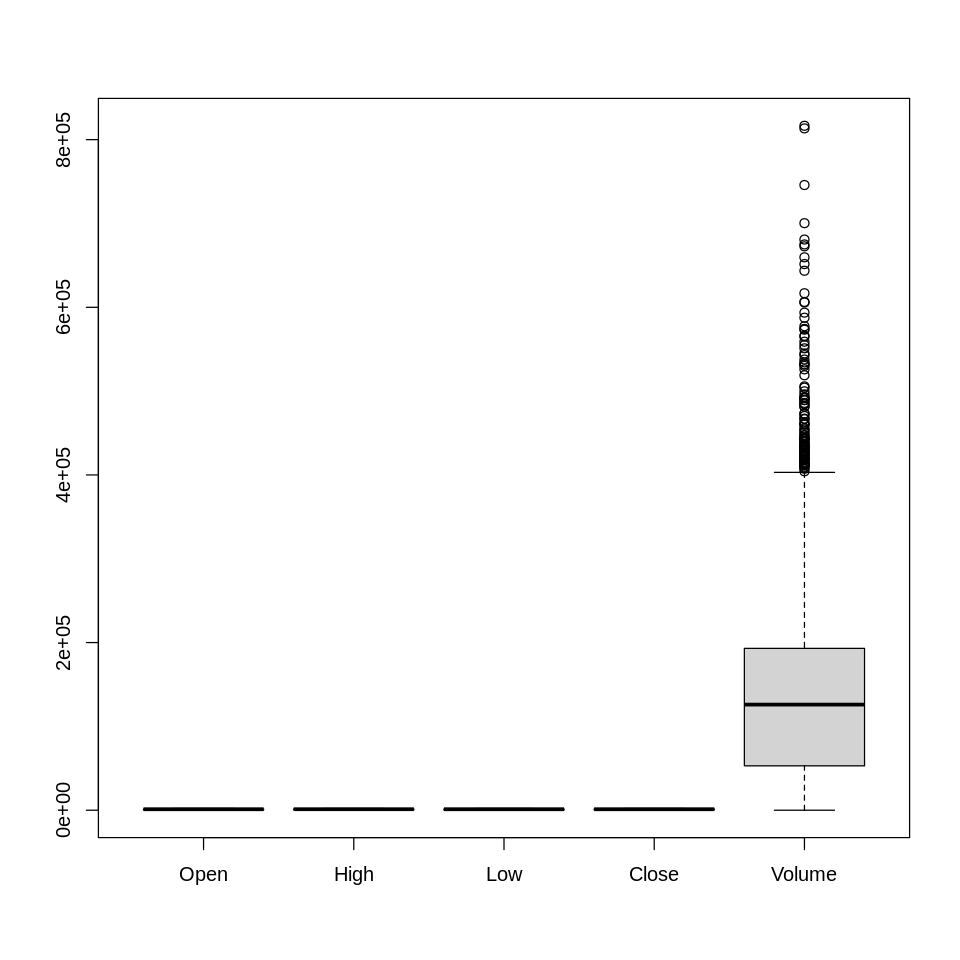

In [28]:
col = c('Open', 'High', 'Low', 'Close', 'Volume')
boxplot(gold[,c('Open', 'High', 'Low', 'Close', 'Volume')])

The next step is to find outliers and remove or deal with outliers. Outliers are differences in data that are not the same as most other data. Data is said to be an outlier if the value of the data is very different from other data or the value is too low or high from other data. Outlier data testing can be done using a boxplot. It can be seen in the boxplot above that the gold data has outliers in the volume column, so we need to handle the outliers.

In [29]:
# Handling the outliers
outliers_Vol <- filter(gold[, c("Volume")])

summary(outliers_Vol)

     Volume      
 Min.   :     0  
 1st Qu.: 52938  
 Median :126006  
 Mean   :139142  
 3rd Qu.:193109  
 Max.   :816531  

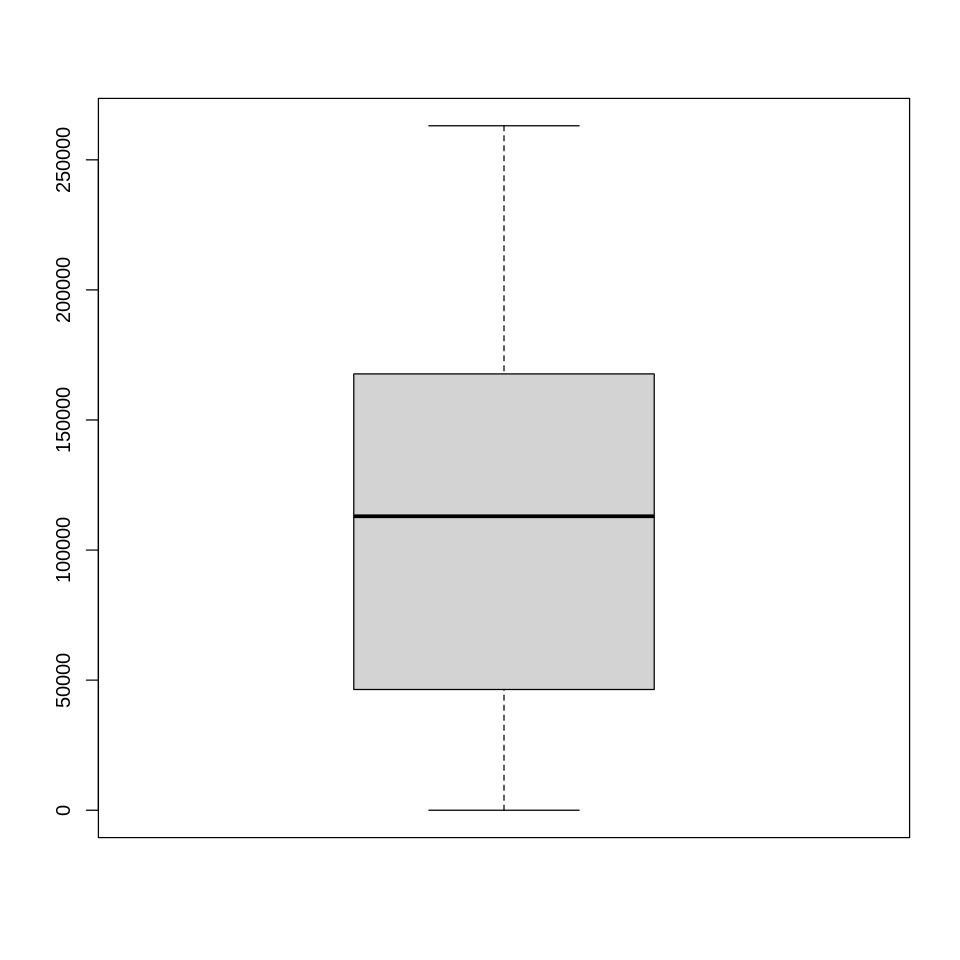

In [30]:
quartile_Vol <- quantile(outliers_Vol$Volume, probs=c(0,0.25,0.5,0.75,1))
IQR_Vol <- IQR(outliers_Vol$Volume)
lower_Vol <- quartile_Vol[1] - 1.5 * IQR_Vol
upper_Vol <- quartile_Vol[2] + 1.5 * IQR_Vol
outliers_clean <- subset(outliers_Vol, outliers_Vol$Volume < upper_Vol & outliers_Vol$Volume > lower_Vol)

boxplot(outliers_clean$Volume)

From the boxplot above, we can see that there are no more outliers in the volume column.

## 4.4 Finding the correlation between features and drop the highly correlated feature

In [41]:
install.packages("corrgam")
devtools::install_github("kwstat/corrgram")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“package ‘corrgam’ is not available for this version of R

A version of this package for your version of R might be available elsewhere,
see the ideas at
https://cran.r-project.org/doc/manuals/r-patched/R-admin.html#Installing-packages”
Skipping install of 'corrgram' from a github remote, the SHA1 (db0da53d) has not changed since last install.
  Use `force = TRUE` to force installation



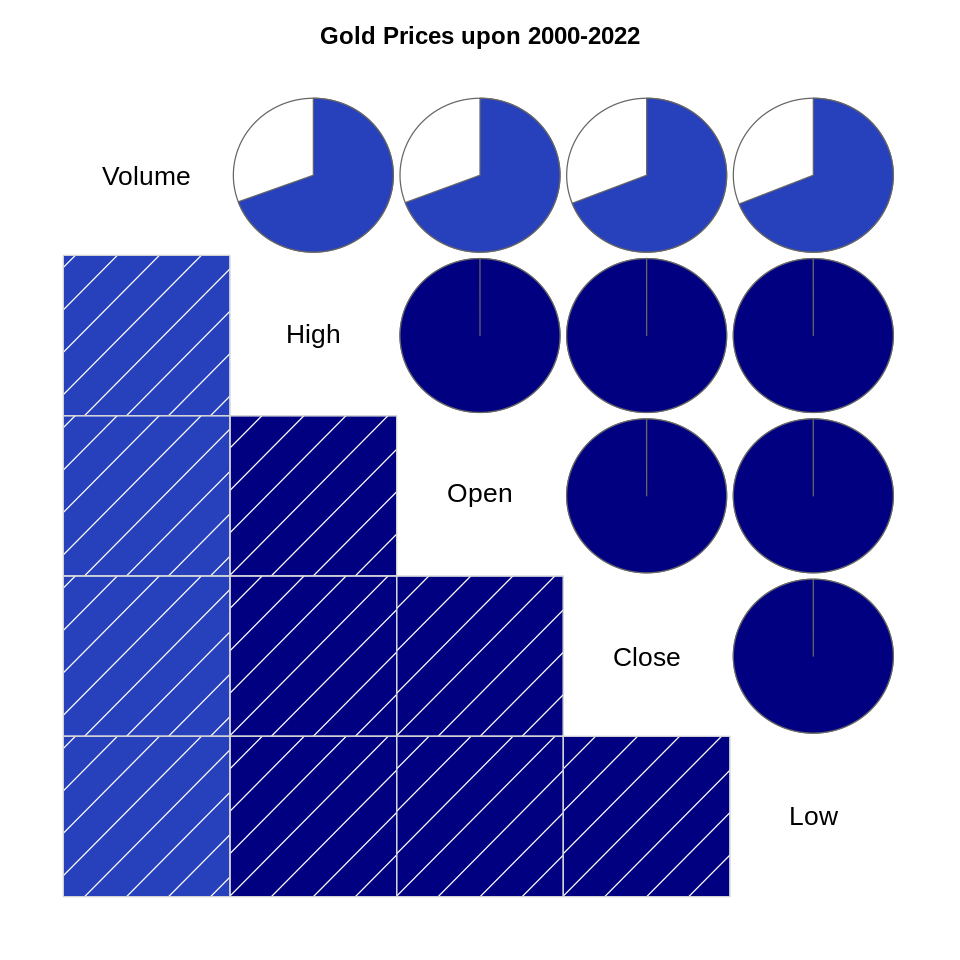

In [42]:
library(corrgram)
corrgram(gold, order=TRUE, lower.panel=panel.shade,
  upper.panel=panel.pie, text.panel=panel.txt,
  main="Gold Prices upon 2000-2022")

If we have finished dealing with outliers, the next step is to find correlations between features and remove highly correlated features. Correlograms or abbreviated corrgrams are usually used to test the level of correlation (reciprocity) between the variables available in the data set. Shaded or colored matrix cells indicate the value of the co-relation. The darker the color, the higher the co-relation between variables

# 5. Statistical Assumption

In [48]:
install.packages("outliers")
library ("outliers")
install.packages("EnvStats")
library("EnvStats")
install.packages("lmtest")
library("lmtest")
install.packages("car")
library("car")
install.packages("mctest")
library("mctest")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘EnvStats’


The following objects are masked from ‘package:stats’:

    predict, predict.lm


The following object is masked from ‘package:base’:

    print.default


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘zoo’


Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘numDeriv’, ‘SparseM’, ‘MatrixModels’, ‘minqa’, ‘nloptr’, ‘Rcpp’, ‘RcppEigen’, ‘carData’, ‘abind’, ‘pbkrtest’, ‘quantreg’, ‘lme4’


Loading required package: carData


Attaching package: ‘car’


The following object is masked from ‘package:EnvStats’:

    qqPlot


In [43]:
goldmodel <- lm(Open ~ High + Low + Close + Volume, data=gold)
summary(goldmodel)


Call:
lm(formula = Open ~ High + Low + Close + Volume, data = gold)

Residuals:
    Min      1Q  Median      3Q     Max 
-50.620  -2.134   0.188   2.251  47.351 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -4.120e-01  1.606e-01  -2.565  0.01033 *  
High         9.318e-01  8.661e-03 107.592  < 2e-16 ***
Low          7.938e-01  9.695e-03  81.876  < 2e-16 ***
Close       -7.256e-01  1.199e-02 -60.509  < 2e-16 ***
Volume      -2.711e-06  1.023e-06  -2.651  0.00804 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.406 on 5698 degrees of freedom
Multiple R-squared:  0.9999,	Adjusted R-squared:  0.9999 
F-statistic: 1.312e+07 on 4 and 5698 DF,  p-value: < 2.2e-16


## 5.1 Normality Test

The first assumption test used is the normality test, where this test is used to see whether there is a normal residual value or not. Since a good regression model is a model with normal distribution. It is also not necessary to use the normality test for every existing variable, but only for residual values, thereby saving testing time for the selected variables. This test starts with null hypothesis or H0, data with normal distribution. This hypothesis proved by knowing the significant value / the p-value of the data. When the significant drops under 0.05, it rejects the H0 and accepts the vice versa, H1, the alternative hypothesis, where the data is not normally distributed. There are three types of normality test, such as Jarque-Bera (BR), Saphiro-Wilk (SW), and Anderson-Darling (AD). In this paper, the focus is on the AD. The AD tests are based on the empirical distribution function (EDF), also on the squared difference between normal and empirical. This test in R code allows to show the p-value needed to conclude the hypothesis.



In [44]:
install.packages("nortest")
library("nortest")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [45]:
#Normality Test : Anderson-Darling (AD) Test
ad.test(goldmodel$residuals)


	Anderson-Darling normality test

data:  goldmodel$residuals
A = 130.3, p-value < 2.2e-16


The test shows that p-value drops far below 0.05, which rejects H0 and accepts H1. This concludes that the alternative hypothesis is chosen, where the data is not normally distributed. This is a caution that the data might still have unknown outliers that disrupted the normality.

## 5.2 Autocorrelation Test

The autocorrelation test is a test conducted to see whether there is a correlation between a period and previous periods. In other words, the autocorrelation test is an analysis of the regression which consists of testing whether there is an influence of the independent variable on the dependent variable, so there should be no correlation between the observations and the previous observational data. There are 3 type of autocorrelation, consisting of negative, positive, and no autocorrelation. The value of autocorrelation varies from -1 for perfectly negative, 1 for perfectly autocorrelation, and 0 for no autocorrelation. Value below -1 considered weak autocorrelation and above 1 considered strong autocorrelation. In R code, Durbin-Watson Test (DW) is usable for this test. Null hypothesis of H0 referred as data has no autocorrelation while the alternative hypothesis H1 has. The significant value above 0.05 casts doubt on the validity of the null hypothesis and indicates autocorrelation among residuals

In [49]:
#Autocorrelation Test : Durbin-Watson (DW) Test
dwtest(goldmodel)


	Durbin-Watson test

data:  goldmodel
DW = 1.9912, p-value = 0.3585
alternative hypothesis: true autocorrelation is greater than 0


The result shows that the p-value lies above 0.05, which is 0.3585, this leads the hypothesis 𝐇ₒ is rejected and Hypothesis H1 is accepted, where the data has autocorrelation.  To be specific, can be concluded from the results of the DW value (Durbin-Watson). The closer to 2, the higher the degree of autocorrelation (high autocorrelation). Vice versa, the closer to 0, the higher the autocorrelation. In this test, the DW result was 1.9912. So, it can be concluded that this test rejects the 𝐇ₒ Hypothesis, that is, the data is highly autocorrelated

## 5.3 Homogeneity Test

Homogeneity test is a test conducted to determine whether the variances of two or more distributions are the same. Homogeneity test can be done by Levene, Fisher, Bartlett or Breush-Pagan test. The homogeneity test is carried out with the aim of showing two or more groups of sample data that have been taken from populations that have the same variance. In other words, the homogeneity test is carried out to determine whether the data set under study has the same characteristics or not. In R code, Breush-Pagan test will be used to prove the homogeneity test. The result of Breush-Pagan test for the significant value if under 0.05, the data is heterogenuous, otherwise it is homogenuous.

In [ ]:
#Homogeneity : Breush-Pagan (BP) Test
bptest(goldmodel, studentize=FALSE, data=gold)

The Breusch-Pagan test shows that p-value drops far below 0.05, which rejects H0 and accepts H1. Like the normality test, this concludes that the alternative hypothesis is chosen, where the data is not homogeneous. In other words, the data is heterogeneous (variance of the variables are different).

## 5.4 Multicollinearity Test

The multicollinearity test is used to determine whether there is a high correlation between the independent variables and the multiple linear regression model. If there is a high correlation between the independent variables, then the relationship with the independent variables and the dependent variable is disrupted.

Multicollinearity testing using the Variance Inflation Factor (VIF) is a test to find out how high the collinearity is between the variables. The results of the VIF show:

VIF is equal to 1 = variables are not correlated with each other.
VIF between 1 to 5 = quite correlated between the variables.
VIF > 5 = highly correlated variables.
VIF > 10 = has a multicollinearity problem that needs to be corrected.

In [50]:
# Multicollinearity Test : Variance Inflation Factor (VIF)
vif(goldmodel)

High         Low       Close      Volume 
3993.450677 4854.294535 7543.453010    2.144939

Based on the test results, it was found that the High, Low, Close variables had VIF > 10, so it can be concluded that there is a multicollinearity problem. As for the volume variable, it has a VIF value of 2, so this variable is quite correlated.

# 6. Outliers Test

## 6.1 The Generalized ESD Test

The generalized (extreme Studentized deviate) ESD test was used to detect one or more outliers in a univariate data set that follows a normal distribution. The main limitation of the Grubbs test and the Tietjen-Moore test is that the number of suspected outliers, k, must be determined with precision. If k is not determined correctly, it can distort the conclusions of this test. On the other hand, common ESD tests (require only that an upper bound for the number of suspected outliers be determined. This test essentially performs r separate tests: a test for one outlier, a test for two outliers, and so on up to r outliers.

### 6.1.1 Open

In [51]:
gold <- select(gold, -Currency)
vector_open <- pull(gold, Open)
rosner <- rosnerTest(vector_open, k=5)$all.stats
rosner

i,Mean.i,SD.i,Value,Obs.Num,R.i+1,lambda.i+1,Outlier
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>
0,1040.383,518.7334,2076.4,5181,1.997206,4.441880,FALSE
1,1040.201,518.5974,2060.2,5580,1.966842,4.441842,FALSE
2,1040.022,518.4668,2055.0,5180,1.957652,4.441804,FALSE
3,1039.844,518.3379,2044.8,5182,1.938804,4.441765,FALSE
4,1039.668,518.2124,2038.4,5183,1.927264,4.441727,FALSE


The result shows that ‘Open’ doesn’t have outliers among the data in that column. This can be seen by the outlier value stated as false. The 'false' means that it doesn't exist such outliers.

### 6.1.2 Low

In [52]:
vector_open <- pull(gold, Low)
rosnerTest(vector_open)$all.stats

i,Mean.i,SD.i,Value,Obs.Num,R.i+1,lambda.i+1,Outlier
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>
0,1031.863,514.4559,2049.0,5180,1.977112,4.441880,FALSE
1,1031.685,514.3246,2027.8,5182,1.936744,4.441842,FALSE
2,1031.510,514.2004,2027.5,5179,1.936968,4.441804,FALSE


The result shows that ‘Low’ doesn’t have outliers among the data in that column. 

### 6.1.3 High

In [53]:
vector_open <- pull(gold, High)
rosnerTest(vector_open)$all.stats

i,Mean.i,SD.i,Value,Obs.Num,R.i+1,lambda.i+1,Outlier
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>
0,1048.339,522.3539,2089.2,5181,1.992635,4.441880,FALSE
1,1048.157,522.2178,2081.8,5180,1.979334,4.441842,FALSE
2,1047.975,522.0841,2078.8,5579,1.974442,4.441804,FALSE


The result shows that ‘High’ doesn’t have outliers among the data in that column. 

### 6.1.4 Close

In [54]:
vector_open <- pull(gold, Close)
rosnerTest(vector_open)$all.stats

i,Mean.i,SD.i,Value,Obs.Num,R.i+1,lambda.i+1,Outlier
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>
0,1040.298,518.5240,2069.4,5180,1.984675,4.441880,FALSE
1,1040.118,518.3903,2049.3,5179,1.946761,4.441842,FALSE
2,1039.941,518.2634,2043.3,5579,1.936002,4.441804,FALSE


The result shows that ‘Close’ doesn’t have outliers among the data in that column. 

### 6.1.5 Volume

In [55]:
vector_open <- pull(gold, Volume)
rosnerTest(vector_open)$all.stats

i,Mean.i,SD.i,Value,Obs.Num,R.i+1,lambda.i+1,Outlier
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>
0,139141.7,102537.4,816531,4240,6.606263,4.441880,TRUE
1,139022.9,102153.2,813406,5034,6.601685,4.441842,TRUE
2,138904.6,101770.8,745843,5069,5.963776,4.441804,TRUE


For variable 'Volume', it does have outliers. But, using this method for the Generalized ESD Test, it doesn't show how many outliers does it have in the data. Hence, going to use another way for this method.

In [56]:
out_Volume <- rosnerTest(gold$Volume, k = 20)
out_Volume

Warning message in rosnerTest(gold$Volume, k = 20):
“The true Type I error may be larger than assumed.
Although the help file for 'rosnerTest' has a table with information
on the estimated Type I error level,
simulations were not run for k > 10 or k > floor(n/2).”


$distribution
[1] "Normal"

$statistic
     R.1      R.2      R.3      R.4      R.5      R.6      R.7      R.8 
6.606263 6.601685 5.963776 5.534563 5.357086 5.313242 5.304842 5.187747 
     R.9     R.10     R.11     R.12     R.13     R.14     R.15     R.16 
5.119931 5.052644 4.795425 4.701740 4.704504 4.592149 4.539937 4.445596 
    R.17     R.18     R.19     R.20 
4.421980 4.420335 4.354039 4.351769 

$sample.size
[1] 5703

$parameters
 k 
20 

$alpha
[1] 0.05

$crit.value
 lambda.1  lambda.2  lambda.3  lambda.4  lambda.5  lambda.6  lambda.7  lambda.8 
 4.441880  4.441842  4.441804  4.441765  4.441727  4.441689  4.441651  4.441612 
 lambda.9 lambda.10 lambda.11 lambda.12 lambda.13 lambda.14 lambda.15 lambda.16 
 4.441574  4.441536  4.441497  4.441459  4.441421  4.441383  4.441344  4.441306 
lambda.17 lambda.18 lambda.19 lambda.20 
 4.441267  4.441229  4.441191  4.441152 

$n.outliers
[1] 16

$alternative
[1] "Up to 20 observations are not\n                                 from the sam

The result shows that ‘Volume’ has 16 outliers. These outliers could be the cause that some statistical assumption is questionable. 

# 7. Regression Model

## 7.1 Linear Model Regression

In [57]:
lmModel <- lm(Open ~ Volume, data = gold)
summary(lmModel)


Call:
lm(formula = Open ~ Volume, data = gold)

Residuals:
     Min       1Q   Median       3Q      Max 
-2135.41  -307.13   -75.18   259.21  1218.28 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 5.532e+02  8.358e+00   66.18   <2e-16 ***
Volume      3.501e-03  4.836e-05   72.40   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 374.4 on 5701 degrees of freedom
Multiple R-squared:  0.479,	Adjusted R-squared:  0.4789 
F-statistic:  5242 on 1 and 5701 DF,  p-value: < 2.2e-16


In [58]:
anova_lmModel <- anova(lmModel)
anova_lmModel

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
Volume,1,734990547,734990546.7,5242.128,0
Residuals,5701,799328224,140208.4,NA,NA


In [59]:
sqrt(anova_lmModel$`Mean Sq`)

[1] 27110.7091   374.4442

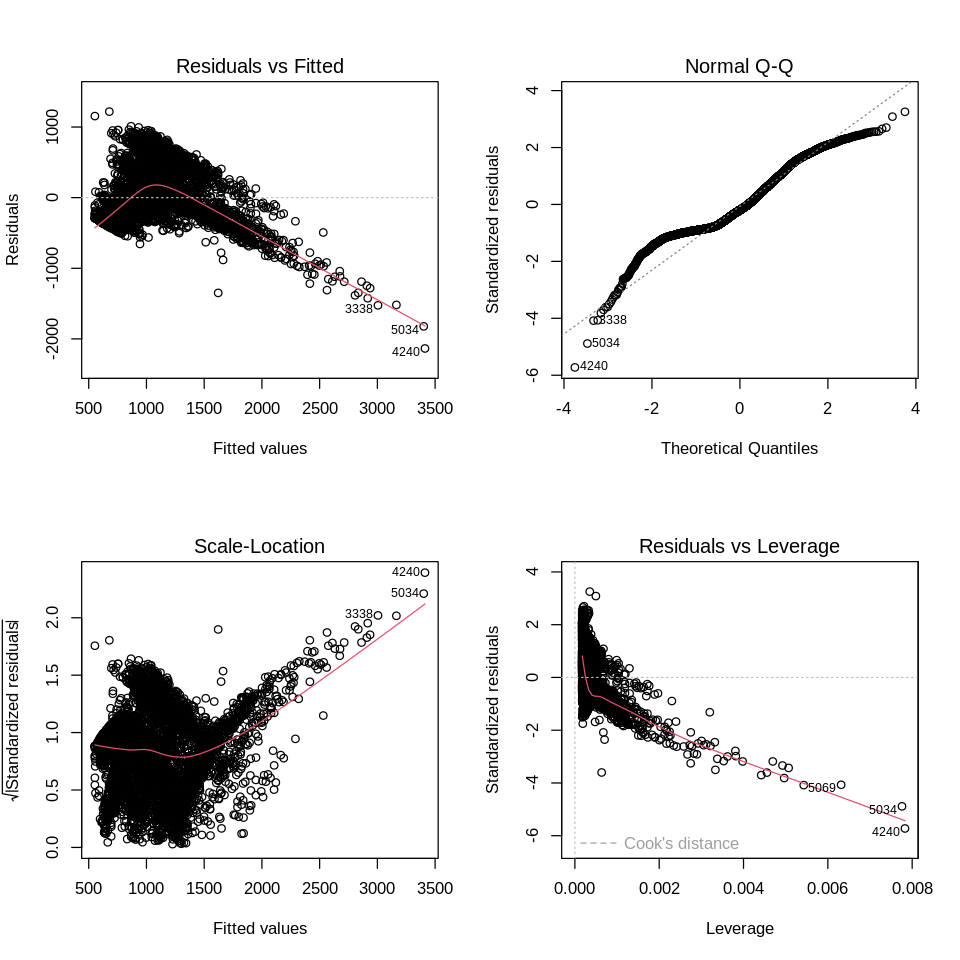

In [60]:
par(mfrow=c(2,2))
plot(lmModel)
par(mfrow=c(1,1))

## 7.2 Logistic Regression (Gaussian)

In [61]:
logistic_Model = glm(Open~Volume, data = gold, family = gaussian)
summary(logistic_Model)


Call:
glm(formula = Open ~ Volume, family = gaussian, data = gold)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-2135.41   -307.13    -75.18    259.21   1218.28  

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 5.532e+02  8.358e+00   66.18   <2e-16 ***
Volume      3.501e-03  4.836e-05   72.40   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for gaussian family taken to be 140208.4)

    Null deviance: 1534318771  on 5702  degrees of freedom
Residual deviance:  799328224  on 5701  degrees of freedom
AIC: 83774

Number of Fisher Scoring iterations: 2


In [62]:
anova(logistic_Model)

,Df,Deviance,Resid. Df,Resid. Dev
,<int>,<dbl>,<int>,<dbl>
NULL,NA,NA,5702,1534318771
Volume,1,734990547,5701,799328224


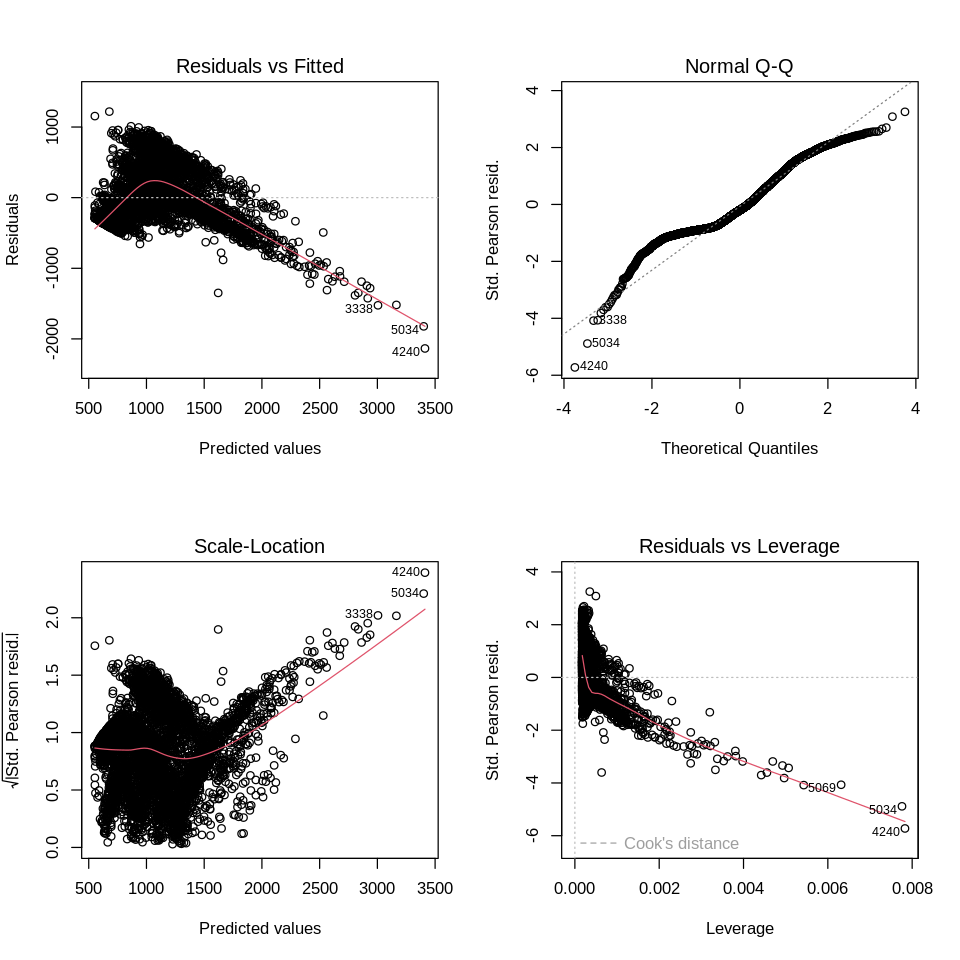

In [63]:
par(mfrow=c(2,2))
plot(logistic_Model)
par(mfrow=c(1,1))

## 7.3 Lasso Regression

In [64]:
install.packages("glmnet")
library("glmnet")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘iterators’, ‘foreach’, ‘shape’


Loading required package: Matrix

Loaded glmnet 4.1-6



In [65]:
#Define Open as predictor and other numeric variables as response variables
y <- gold$Open
x <- data.matrix(gold[, c('Low', 'High', 'Close', 'Volume')])

In [66]:
#fit lasso regression model using k-fold cross-validation
cv_model <- cv.glmnet(x, y, alpha = 1)
best_lambda <- cv_model$lambda.min
best_lambda

[1] 12.55139

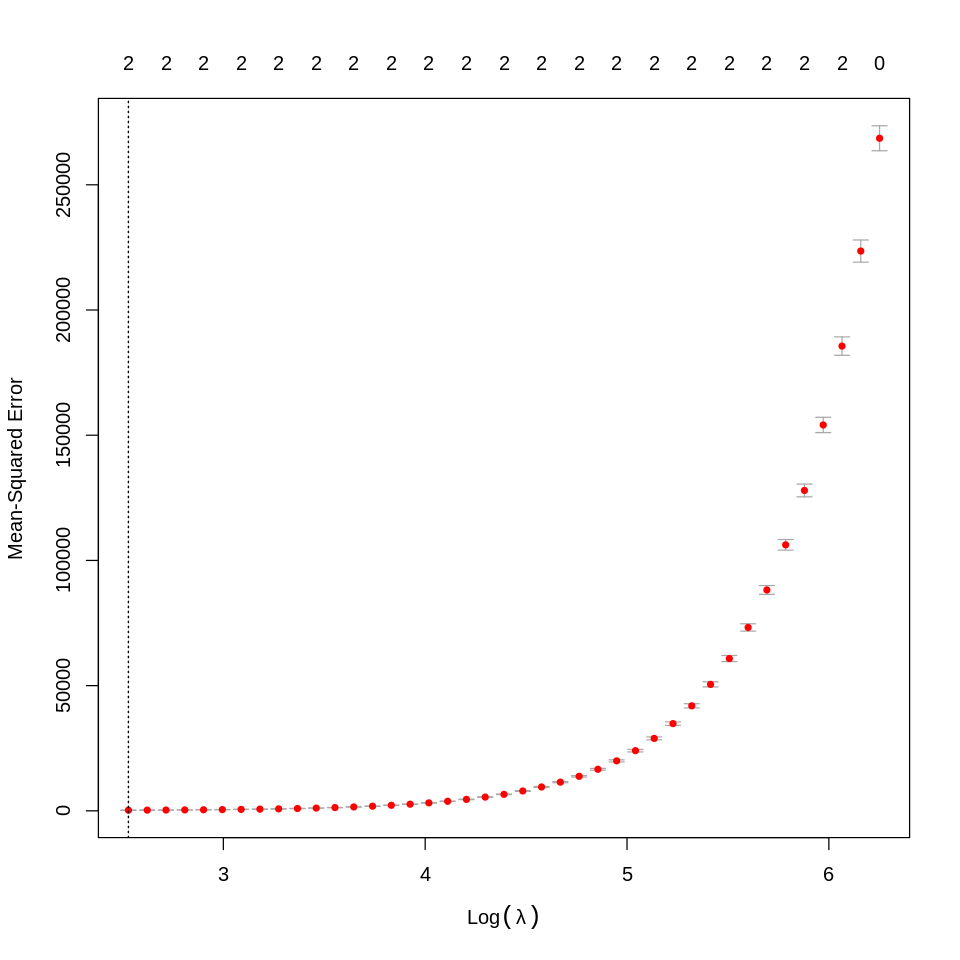

In [67]:
plot(cv_model)

In [68]:
#view coefficients of best model
best_model <- glmnet(x, y, alpha = 1, lambda = best_lambda)
coef(best_model)

5 x 1 sparse Matrix of class "dgCMatrix"
                      s0
(Intercept) 2.501713e+01
Low         9.831928e-01
High        8.062412e-04
Close       .           
Volume      .           

In [69]:
#make a prediction for the response value of a new observation
new = matrix(c(24, 2.5, 3.5, 18.5), nrow=1, ncol=4) 
predict(best_model, s = best_lambda, newx = new)

s1
48.61578


In [70]:
#find R-squared of model on training data
y_predicted <- predict(best_model, s = best_lambda, newx = x)

#find SST and SSE
sst <- sum((y - mean(y))^2)
sse <- sum((y_predicted - y)^2)

#find R-squared
rsq <- 1 - sse/sst
rsq

[1] 0.999078

The R-squared turns out to be 0.99907798. That is, the best model was able to explain 99.91% of the variation in the response values of the training data.

## 7.4 Ridge Regression

In [71]:
#fit ridge regression model
ridge_model <- glmnet(x, y, alpha = 0)
summary(ridge_model)

          Length Class     Mode   
a0        100    -none-    numeric
beta      400    dgCMatrix S4     
df        100    -none-    numeric
dim         2    -none-    numeric
lambda    100    -none-    numeric
dev.ratio 100    -none-    numeric
nulldev     1    -none-    numeric
npasses     1    -none-    numeric
jerr        1    -none-    numeric
offset      1    -none-    logical
call        4    -none-    call   
nobs        1    -none-    numeric

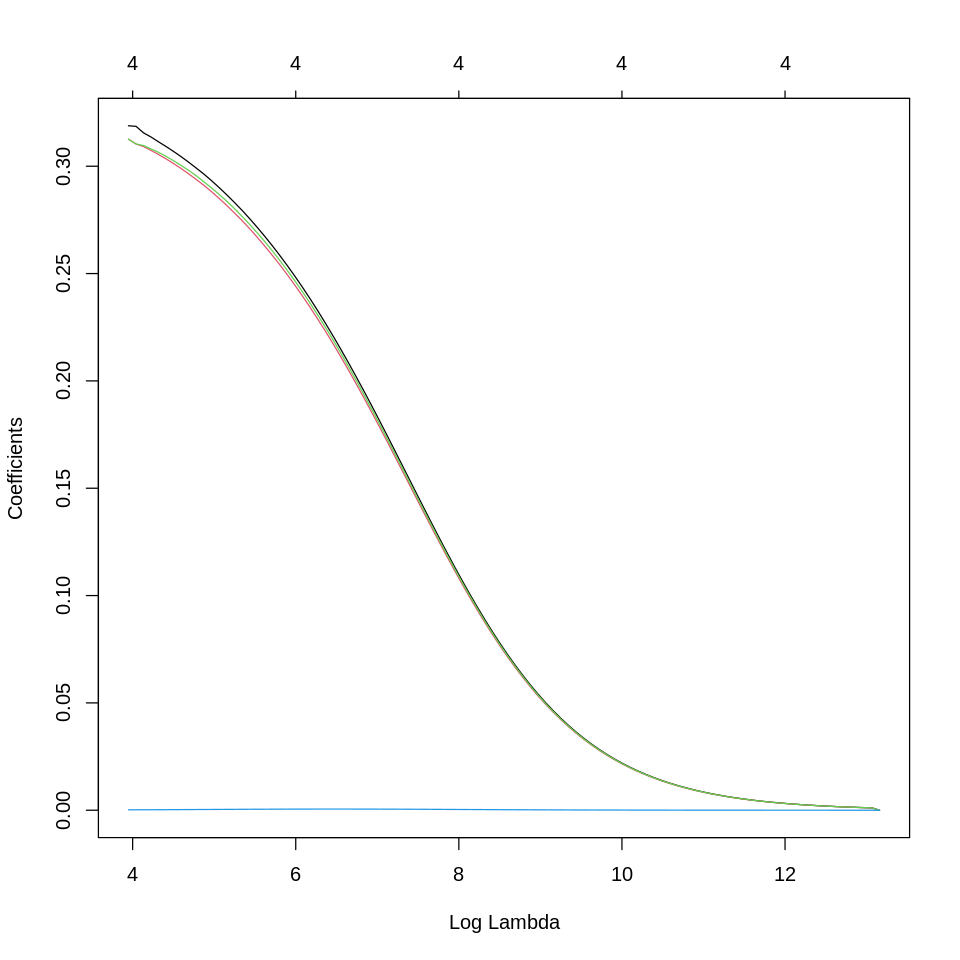

In [72]:
#produce Ridge trace plot
plot(ridge_model, xvar = "lambda")

In [76]:
#find coefficients of best model
best_model <- glmnet(x, y, alpha = 0, lambda = best_lambda)
coef(best_model)

#find SST and SSE
sst <- sum((y - mean(y))^2)
sse <- sum((y_predicted - y)^2)

#find R-Squared
rsq <- 1 - sse / sst
rsq

5 x 1 sparse Matrix of class "dgCMatrix"
                      s0
(Intercept) 8.163383e+00
Low         3.260497e-01
High        3.335598e-01
Close       3.246357e-01
Volume      6.021972e-05

[1] 0.9981367

In [75]:
#calculate R-squared of model on training data
y_predicted <- predict(ridge_model, s = best_lambda, newx = x)

The R-squared turns out to be 0.99813667. That is, the best model was able to explain 99.84% of the variation in the response values of the training data.

# 8. Measurements

## 8.1 R-squared

R Square measures how much variability in dependent variable can be explained by the model. It is the square of the Correlation Coefficient(R) and that is why it is called R Square.

In [77]:
summary(goldmodel)$r.squared

[1] 0.9998915

The result shows that the numerical variables in the gold dataset has R-square of 0.99989. It means that all movements of a/other dependent variable) are completely explained by movements in the index (or independent variable). The 99.99 % fitness of the gold dataset means that the price of performance moves relatively in line thorough the time.

## 8.2 Mean Square Error

Mean Square Error is an absolute measure of the goodness for the fit. MSE is calculated by the sum of square of prediction error which is real output minus predicted output and then divide by the number of data points. It gives you an absolute number on how much your predicted results deviate from the actual number.

In [78]:
gold_summarize <- summary(goldmodel)
mean(gold_summarize$residuals^2)

[1] 29.19755

Techinally, an ideal Mean Squared Error (MSE) value is 0.0, which means that all predicted values matched the expected values exactly. In this part, the MSE value is 29.2, which is high. From the outlier test, the volume cause this high value since MSE is most useful when the dataset contains outliers , where the 'volume' consists of 16 outliers.

## 8.3 Root Mean Square Error

Root Mean Square Error (RMSE) is the standard deviation of the residuals (prediction errors). Residuals are a measure of how far from the regression line data points are; RMSE is a measure of how spread out these residuals are. In other words, it tells you how concentrated the data is around the line of best fit.

In [79]:
sqrt(mean(gold_summarize$residuals^2))

[1] 5.403475

The result of RMSE, which is 5.403 , explains that the squared root of squared differences between the predictions and observed values is around 5. This is considered a little bit high since 0 is the perfect score for RMSE. Again, this result is the cause of 'Volume' that have 16 outliers.

## 8.4 Mean Absolute Error

Mean absolute error (MAE) characterizes the alteration among the original and predictable values ​​and is mined as the dataset's total deviation mean. MAE is similar to Mean Square Error(MSE). However, instead of the sum of square of error in MSE, MAE is taking the sum of the absolute value of error.

In [80]:
install.packages("Metrics")
library("Metrics")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [81]:
mae(gold$Open, predict(goldmodel))

[1] 3.500681

The result of MAE shows that there is 3.5 % difference from the true value.

# 9. Analysis and Discussion

## 9.1 Analysis

### 9.1.1 Linear Regression Model

Linear regression models describe the relationship between the dependent variable, y, and one or more independent variables, X. The dependent variable is also called the response variable. Independent variables are also called explanatory or predictor variables. Continuous predictor variables are also called covariates, and categorical predictor variables are also called factors. The X matrix of observations on the predictor variable is usually called the design matrix.

### 9.1.2 Logistic Regression

This type of statistical model (also known as a logit model) is often used for classification and predictive analytics. Logistic regression estimates the likelihood of an event occurring, such as voting or not voting, based on a given independent variable dataset. Since the result is a probability, the dependent variable is bounded between 0 and 1.

### 9.1.3 Lasso Regression

Lasso regression, or the Least Absolute Shrinkage and Selection Operator, is also a modification of linear regression. In lasso, the loss function is modified to minimize the complexity of the model by limiting the sum of the absolute values of the model coefficients.

### 9.1.4 Ridge Regression

Ridge regression is an extension of linear regression where the loss function is modified to minimize the complexity of the model. This modification is done by adding a penalty parameter that is equivalent to the square of the magnitude of the coefficients.

## 9.2 Discussion

### 9.2.1 Linear vs Logistic Regression

To find out which regression method is better, we can compare the R square, where the closer to number 1, the better. The plot results from the two methods above have the same picture, so the R square is the same, it is 0.479. So, there is nothing better between Linear Regression and Logistic Regression.

### 9.2.2 Lasso vs Ridge Regression


From the results of the lasso regression and the ridge regression, we can see that the lasso regression has a higher r-squared result than the ridge regression. This means that the lasso regression models are better than the ridge regression models when used on the gold dataset, considering the fact that the lasso regression can explain more of the variation in the dependent variable.

Lasso r-squared > Ridge r-squared

0.9991 > 0.9981